In [ ]:
что-бы получить зачет надо всё сдать
если не сдать будут проблемы
карпов любит сидеть
за решёткой в темнице сырой
как делаются работы?
на компах, можно писать сорокоумову на почту
штука старая
скайп причем-то тут
в условиях могут быть ошибки
сдавать можно всё на занятиях
занятий 5 будет
рекомендуется все написать а потом прислать на почту
так всё ладно
презентация будет это не страшно
а варианты выберем сегодня
ладно
теория:
1. какое место штука?
 30-40 годы область едина, 
    задачи:
        1. автопилот корабля не отклоняясь от курса
        2. фейс контроль
        3. приследование человека
    конкретно автопилот:
    скорее всего запишем уравнение с факторсами, оно будет диффуром
    решаем с помощью моделироваия
    по лицу:
    решается как угодно
    что самое плохое хз какой самый лучший
    а) лицо измемничиво
    б) лицо грязнеет
    в) бывают уроды
    следоваие под чебуреком:
    это экшули смесь первых двух задач

кибернетика распалась на две части:
    1.теория управления
    2.теория искусственного интелекта
как это делать?

рассмотри блок который принимает х и возвращает у
зависимость у(х) записывается линейным дифуром
такая система линейная

обозначим р=дэподэтэ
часто х и у дискретные, а не непрерывные
придаточная функция - частное полиномов
если на входе синусоида то на выходе в итоге будет тоже синус с здвинутой фазой и амплитудой
по передаточной функции можно определить эти амплитуды и фазы

также можно подавать единичку и дельту

дальше какая-то хуйня с резисторами

фильтры:
    а) высок частот
    б) низких
    в) средних (полосовой(полосатый))
    г) реджектор
    
переходная функция - это реакция на ступеньку
она равна сумме вычетов (подробнее в письме сорокоумова)

ЗАДАНИЕ 1.
есть дифур, надо посчитать передточные функции (АЧХ и ФЧХ) и воспользоваться питоном
графики в дБ (если -20, то Авых меньше Авх в 10^2 раз)
КРАЙНЕ ВАЖНАЯ ИНФА: если кто-то будет заниматься передачами сигналов то мы молодцы


In [1]:
import math
from scipy import signal
import matplotlib.pyplot as plt

Xs = range(1,100) # целые от 1 до 99
Ys = [x**0.5 for x in Xs] # корни из этих чисел

plt.figure()
plt.plot(Xs, Ys)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
test_RC = signal.lti([1, 0], [1, 5000])

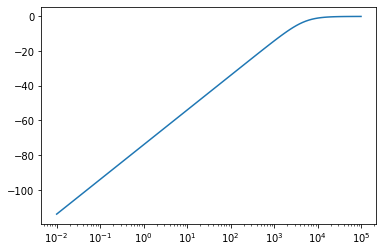

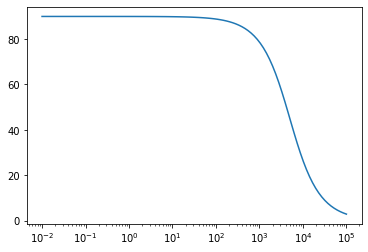

In [4]:
w, mag, phase = signal.bode(test_RC)
plt.figure()
plt.semilogx(w,mag)
plt.figure()
plt.semilogx(w, phase)
plt.show()
# 1. Каковы области значений ФЧХ? АЧХ?
# АЧХ: [-110,0] дБ
# ФЧХ: [0,90] градусы цельсия

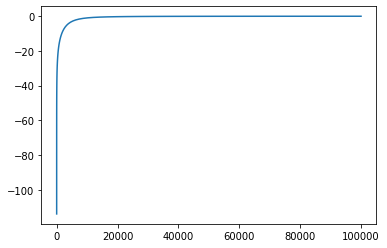

In [61]:
plt.figure()
plt.plot(w,mag)
plt.show()
# часто входная амплитуда отличается от выходной в несколько миллиардов раз
# и график получается нечитаемым (слишком резким)
# а логарифм норм

In [5]:
import numpy as np

T= np.linspace(0,100,1e4 + 1)
S = [math.sin(t*2*math.pi) for t in T]
Tout, yout, xout = signal.lsim(test_RC, S, T)

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


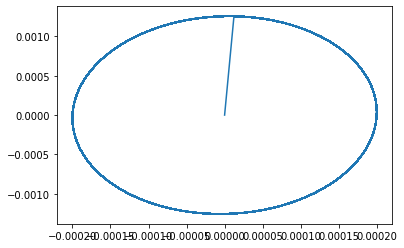

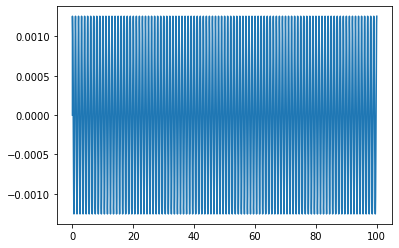

In [6]:
plt.figure()
plt.plot(xout, yout)
plt.figure()
plt.plot(Tout, yout)
plt.show()

In [64]:
# А0 = 1
# омега0 = 2*пи

In [7]:
# 9. (1+bp)x = (1+bp^2)(1+cp)y
b = 1
c = 2
model = signal.lti([b, 1], [1, c, b, b*c])


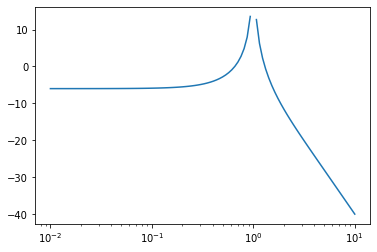

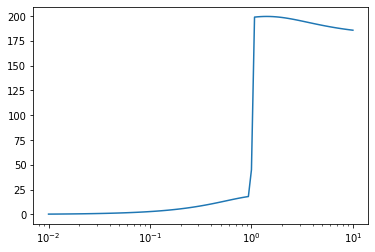

In [9]:
w, mag, phase = signal.bode(model)
plt.figure()
plt.semilogx(w,mag)
plt.figure()
plt.semilogx(w, phase)
plt.show()

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


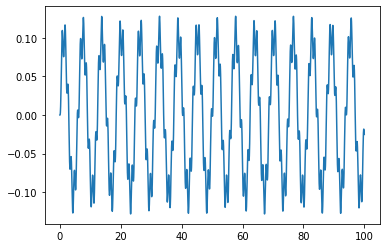

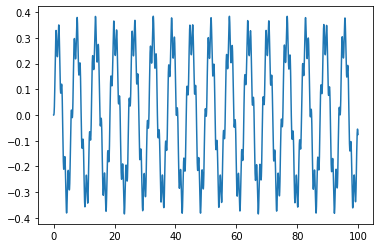

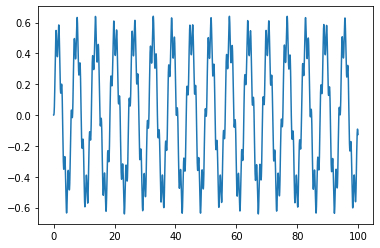

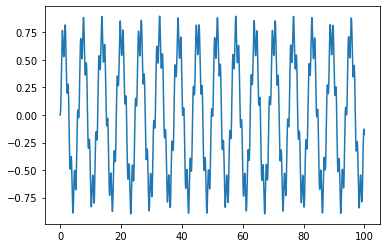

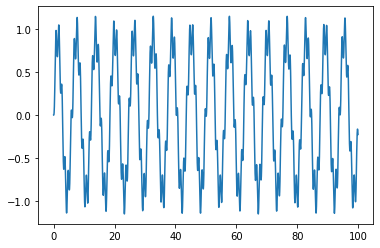

In [78]:
T= np.linspace(0,100,1e4 + 1)

for A in range(1,10,2):
    S = [A*math.sin(t*2*math.pi) for t in T]
    Tout, yout, xout = signal.lsim(model, S, T)
    plt.figure()
    plt.plot(Tout, yout)
plt.show()

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


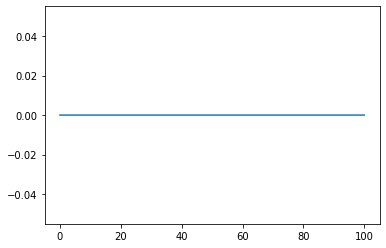

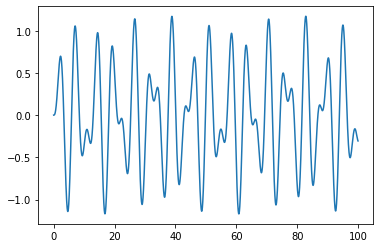

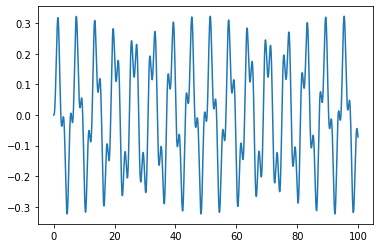

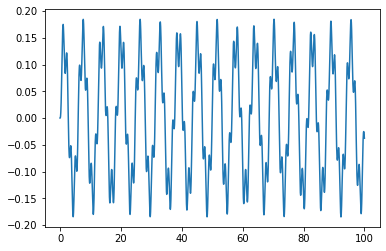

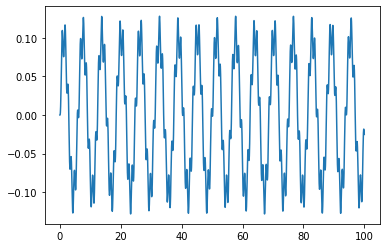

In [79]:
T= np.linspace(0,100,1e4 + 1)

for phi in np.linspace(0,2,5):
    S = [math.sin(t*phi*math.pi) for t in T]
    Tout, yout, xout = signal.lsim(model, S, T)
    plt.figure()
    plt.plot(Tout, yout)
plt.show()

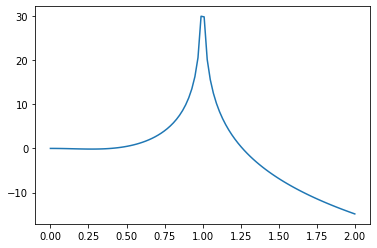

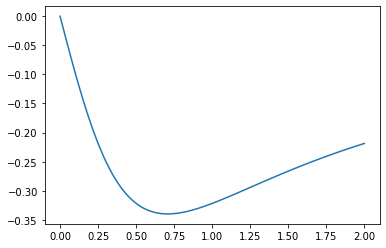

In [96]:
x = np.linspace(0,2,100)
A = [20*math.log10( math.sqrt(1+t**2)/( abs(1-t**2)*math.sqrt(1+4*t**2) ) ) for t in x]
y = [math.atan(t)- math.atan(2*t) for t in x]
plt.figure()
plt.plot(x, A)
plt.figure()
plt.plot(x, y)
plt.show()

/home/konstantin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


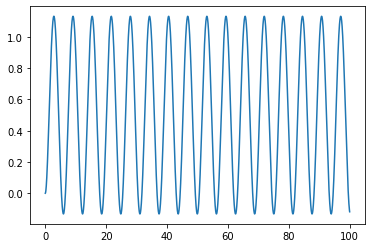

In [97]:
T= np.linspace(0,100,1e4 + 1)

S = np.ones_like(T)
Tout, yout, xout = signal.lsim(model, S, T)
plt.figure()
plt.plot(Tout, yout)
plt.show()